<a href="https://colab.research.google.com/github/FabianHaas97/GithubUpload/blob/main/Truckerkoenig_Daten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mobility - in our globalised world it is one of the most important qualities. The immediate connection our mind makes when hearing this word is probably to vehicles of all kinds: cars, trucks, busses to name of few. Despite actions against climate change becoming increasingly important and electro vehicles on the rise, fuels still play an essential role in our daily life namely when we go to the gas station. Naturally, there are many gas stations in Germany which makes one wonder how they differentiate themselves from each other given that all sell the same product. In the following notebook we will be trying to create a data-driven pricing strategy for a fuel station of our choice. For this purpose we will be focussing on the 4Ps of marketing with an emphasis on the price. The strategy will be based on historic data. 

As a first step the library "pandas" is imported.

In [2]:
import pandas as pd
print ("pandas was imported")

pandas was imported


# Station

Given that we only want to come up with a strategy for one gas station, it is necessary to have an overview form which we can chose. Thus, the available station are examined in the following:

In [28]:
!wget -O stations.csv https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=%2Fstations%2Fstations.csv

--2021-06-29 13:11:30--  https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=%2Fstations%2Fstations.csv
Resolving dev.azure.com (dev.azure.com)... 13.107.42.20, 2620:1ec:21::20
Connecting to dev.azure.com (dev.azure.com)|13.107.42.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘stations.csv’

stations.csv            [     <=>            ]   1.79M  1.34MB/s    in 1.3s    

2021-06-29 13:11:32 (1.34 MB/s) - ‘stations.csv’ saved [1880990]



In [ ]:
pd.read_csv("stations.csv")

In [ ]:
stations = pd.read_csv("stations.csv")

In [ ]:
stations

Since we live in Baden-Württemberg and Pforzheim University is located there we have chosen a city in this Bundesland. Due to the attention it has gained during the ongoing COVID-19 pandemic with its modell project and the headquaters of Curevac being situated here, the city that was chosen is Tübingen. In order to check what sample of gas stations in Tübingen we can chose from, the data set was examined.

In total there are three available gas stations in Tübingen. For the price analysis and price prediction, the gas station "ca944555-1ee4-4228-979d-8313690ae950	" is chosen (Aral Tankstelle, Reutlinger Str. 72, Tübingen) due to its proximity to two very busy roads - the B27 and B28.

In [112]:
stations_Tübingen = stations[(stations.city == "Tübingen")]

In [ ]:
stations_Tübingen

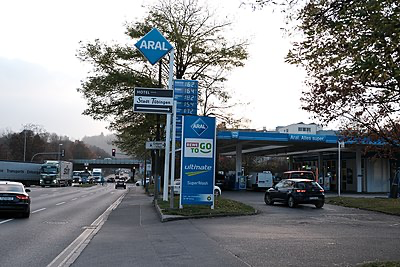

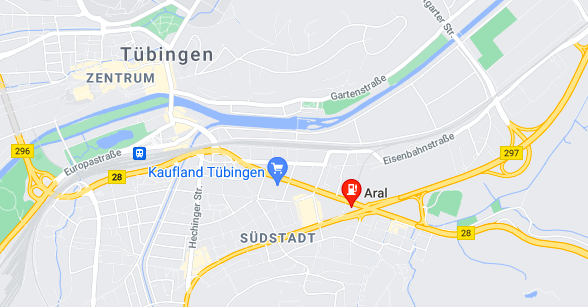

Thus, to only see the pricing information from the Aral Station in Tübingen, the data set is filtered.


In [ ]:
my_station = "ca944555-1ee4-4228-979d-8313690ae950"

If we try to figure out the best strategy for our station, than we need to consider stations that are nearby as well. To figure out, which stations are nearby our station and therefore maybe influential on the price, we calculate the geographical distance between the stations:

In [ ]:
station_pos = (stations[stations.uuid==my_station].latitude.iloc[0], stations[stations.uuid==my_station].longitude.iloc[0])

In [ ]:
from geopy.distance import geodesic

In [ ]:
stations['distance to my station'] = stations.apply(lambda x: geodesic(station_pos, (x['latitude'], x['longitude'])), axis=1 )

In [ ]:
station_distance = stations.sort_values('distance to my station', ascending=True)

In [ ]:
station_distance

As we can see, the 3 stations nearby are:

51d4b534-a095-1aa0-e100-80009459e03a (Jet gas station in Tübingen);

f60a788d-c9f0-434b-a8e0-b49ccd202866 (Sprint gas stations in Tübingen);

386fa94f-2434-451c-981e-a7e230e08114 (Esso gas station in Tübingen).

Unfortunately, the Sprint gas station does not report any gas prices, therefore the 4th nearest station:

4e25d68d-ee62-49be-8abd-c4fc908bbc91 (Esso gas station in Tübingen) is selected.

Together with our chosen stations, the nearest four gas stations can be stored in a list:

In [ ]:
near_stations = station_distance.iloc[1:5].uuid.tolist()

In [ ]:
near_stations

Since the Sprint gas station does not report any gas prices, we can eliminate it from the list:

In [ ]:
near_stations.pop (2)

In [ ]:
print (near_stations)

# Downloading the data of three days (currently used)

Next the Tankerkoenig data set is downloaded. It contains historical gasoline price data in Germany.

Download the entire data set (only recommended at the end as it takes like forever and the download needs to be repeated every time Google colab is opened):

In [ ]:
!git clone https://tankerkoenig@dev.azure.com/tankerkoenig/tankerkoenig-data/_git/tankerkoenig-data

Thus, only the data from one day (May 10th, 2021) is downloaded here as "data1005.csv":

In [3]:
!wget -O data1005.csv https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=%2Fprices%2F2021%2F05%2F2021-05-10-prices.csv&versionDescriptor%5BversionOptions%5D=0&versionDescriptor%5BversionType%5D=0&versionDescriptor%5Bversion%5D=master&resolveLfs=true&%24format=octetStream&api-version=5.0&download=true

/bin/bash: versionDescriptor%5BversionOptions%5D=0: command not found
/bin/bash: line 0: bg: no job control
/bin/bash: versionDescriptor%5BversionType%5D=0: command not found
/bin/bash: versionDescriptor%5Bversion%5D=master: command not found
/bin/bash: api-version=5.0: command not found
--2021-06-29 13:08:13--  https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=%2Fprices%2F2021%2F05%2F2021-05-10-prices.csv
Resolving dev.azure.com (dev.azure.com)... 13.107.42.20, 2620:1ec:21::20
Connecting to dev.azure.com (dev.azure.com)|13.107.42.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘data1005.csv’

data1005.csv            [       <=>          ]  25.86M  4.99MB/s    in 5.6s    

2021-06-29 13:08:19 (4.60 MB/s) - ‘data1005.csv’ saved [27118492]



Having done that, it is important to have a look at the data set.

In [4]:
data1005 = pd.read_csv("data1005.csv")

In [5]:
data1005

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2021-05-10 00:01:14+02,7cb85433-e1a3-4114-31a1-3a544017a218,1.329,1.559,0.000,1,1,0
1,2021-05-10 00:01:14+02,0d58c4ba-3267-404a-89d6-6ba15a8fc422,1.389,1.589,1.529,1,1,1
2,2021-05-10 00:01:14+02,f059c970-6882-45ed-97c0-eb544f70b02c,1.389,1.539,0.000,1,0,0
3,2021-05-10 00:01:14+02,57f207da-80a0-4e61-b98d-d6eef0d79cfe,1.329,1.549,1.489,1,1,1
4,2021-05-10 00:02:16+02,59ca7896-2c19-4354-97a2-a0f1de18be4f,1.309,1.539,1.479,1,1,1
...,...,...,...,...,...,...,...,...
322833,2021-05-10 23:57:07+02,6327cfc5-adad-44a2-a919-ed381bb175b6,1.399,1.629,1.569,1,0,0
322834,2021-05-10 23:57:07+02,308733a3-f3a6-4259-a10a-8a8e08efa94e,1.449,0.000,0.000,1,0,0
322835,2021-05-10 23:59:09+02,00299b2b-4fcf-454a-9dfd-871a57bfe4ff,1.279,1.529,1.469,1,1,1
322836,2021-05-10 23:59:09+02,96e941ed-28a2-40ad-ab26-0a4389d28aa6,1.369,1.529,1.469,0,1,1


Now, May 11th, 2021 is downloaded

In [6]:
!wget -O data1105.csv https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=%2Fprices%2F2021%2F05%2F2021-05-11-prices.csv&versionDescriptor%5BversionOptions%5D=0&versionDescriptor%5BversionType%5D=0&versionDescriptor%5Bversion%5D=master&resolveLfs=true&%24format=octetStream&api-version=5.0&download=true

/bin/bash: line 0: bg: no job control
/bin/bash: api-version=5.0: command not found
/bin/bash: versionDescriptor%5BversionOptions%5D=0: command not found
/bin/bash: versionDescriptor%5BversionType%5D=0: command not found
/bin/bash: versionDescriptor%5Bversion%5D=master: command not found
--2021-06-29 13:08:20--  https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=%2Fprices%2F2021%2F05%2F2021-05-11-prices.csv
Resolving dev.azure.com (dev.azure.com)... 13.107.42.20, 2620:1ec:21::20
Connecting to dev.azure.com (dev.azure.com)|13.107.42.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘data1105.csv’

data1105.csv            [     <=>            ]  25.70M  4.71MB/s    in 6.7s    

2021-06-29 13:08:28 (3.86 MB/s) - ‘data1105.csv’ saved [26945289]



In [7]:
data1105 = pd.read_csv ("data1105.csv")

In [8]:
data1105

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2021-05-11 00:00:11+02,cee140c2-e424-426e-afaa-cd6706163b56,1.359,1.569,1.509,1,1,1
1,2021-05-11 00:00:11+02,4be6cac8-e125-41eb-ac4f-4103f8735107,1.294,0.000,0.000,1,0,0
2,2021-05-11 00:00:11+02,0ff87eee-daf2-4966-a573-515d1458883a,1.309,1.509,1.449,1,1,1
3,2021-05-11 00:01:08+02,0d58c4ba-3267-404a-89d6-6ba15a8fc422,1.389,1.599,1.539,1,1,1
4,2021-05-11 00:01:08+02,dfc32f99-aa65-4fd4-b16e-a2cc53f9be15,1.389,1.599,1.539,1,1,1
...,...,...,...,...,...,...,...,...
320771,2021-05-11 23:59:09+02,c0acae4e-d4e5-4d2d-adb5-5c72f838e7ed,1.329,1.579,1.519,1,1,1
320772,2021-05-11 23:59:09+02,cee140c2-e424-426e-afaa-cd6706163b56,1.339,1.579,1.519,1,1,1
320773,2021-05-11 23:59:09+02,00299b2b-4fcf-454a-9dfd-871a57bfe4ff,1.279,1.529,1.469,1,1,1
320774,2021-05-11 23:59:09+02,65b83b5f-f0c5-4db0-8be1-e111cd066276,1.279,1.529,1.469,1,1,1


and May, 12th

In [9]:
!wget -O data1205.csv https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=%2Fprices%2F2021%2F05%2F2021-05-12-prices.csv&versionDescriptor%5BversionOptions%5D=0&versionDescriptor%5BversionType%5D=0&versionDescriptor%5Bversion%5D=master&resolveLfs=true&%24format=octetStream&api-version=5.0&download=true

/bin/bash: line 0: bg: no job control
/bin/bash: api-version=5.0: command not found
/bin/bash: versionDescriptor%5Bversion%5D=master: command not found
/bin/bash: versionDescriptor%5BversionType%5D=0: command not found
/bin/bash: versionDescriptor%5BversionOptions%5D=0: command not found
--2021-06-29 13:08:29--  https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=%2Fprices%2F2021%2F05%2F2021-05-12-prices.csv
Resolving dev.azure.com (dev.azure.com)... 13.107.42.20, 2620:1ec:21::20
Connecting to dev.azure.com (dev.azure.com)|13.107.42.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘data1205.csv’

data1205.csv            [     <=>            ]  25.90M  4.97MB/s    in 6.9s    

2021-06-29 13:08:37 (3.75 MB/s) - ‘data1205.csv’ saved [27162678]



In [10]:
data1205 = pd.read_csv ("data1205.csv")

# Try to download all the data and merge it (only shows data of one day)

We try to download all the data between January 1st and May 31st, 2021.

In [65]:
from datetime import date, timedelta, datetime
import requests

start_date = date(2021, 1, 1)
end_date = date(2021, 5, 31) # take May 31st as end
delta = timedelta(days=1) # delta we want to generate dates for

current_date = start_date

all_dates = []

while current_date <= end_date:
  all_dates.append(current_date)
  current_date += delta

In [ ]:
all_dates

In [68]:
from tqdm import tqdm

for current_date in tqdm(all_dates):
  current_url = 'https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=%2Fprices%2F{year}%2F{month:02d}%2F{year}-{month:02d}-{day:02d}-prices.csv'.format(year = current_date.year, month = current_date.month, day = current_date.day)
  current_file_name =  '{}-{:02d}-{:02d}.csv'.format(current_date.year, current_date.month, current_date.day)

  current_file = requests.get(current_url) # download the csv file

  open(current_file_name, 'wb').write(current_file.content) # write it to disk

100%|██████████| 151/151 [15:49<00:00,  6.29s/it]


In [70]:
Tankerkoenig = pd.DataFrame()

In [100]:
for current_date in tqdm(all_dates):
  current_file_name =  '{}-{:02d}-{:02d}.csv'.format(current_date.year, current_date.month, current_date.day)
  current_daten = pd.read_csv(current_file_name).drop(['dieselchange', 'e5change', 'e10change'], axis=1) # drop some columns we don't need
  current_daten = current_daten[current_daten.station_uuid.isin([my_station, *near_stations])] # drop rows we dont need
  Daten = pd.concat([Tankerkoenig, current_daten]) # add it to our dataframe

100%|██████████| 151/151 [01:21<00:00,  1.84it/s]


In [101]:
Daten

,date,station_uuid,diesel,e5,e10
7245,2021-05-31 05:52:08+02,51d4b534-a095-1aa0-e100-80009459e03a,1.349,1.569,1.509
15322,2021-05-31 06:52:11+02,51d4b534-a095-1aa0-e100-80009459e03a,1.369,1.589,1.529
21842,2021-05-31 07:25:08+02,51d4b534-a095-1aa0-e100-80009459e03a,1.319,1.499,1.439
28312,2021-05-31 07:48:08+02,4e25d68d-ee62-49be-8abd-c4fc908bbc91,1.389,1.609,1.549
31468,2021-05-31 07:57:06+02,ca944555-1ee4-4228-979d-8313690ae950,1.379,1.559,1.499
32050,2021-05-31 07:58:07+02,ca944555-1ee4-4228-979d-8313690ae950,1.369,1.549,1.489
45044,2021-05-31 08:40:08+02,4e25d68d-ee62-49be-8abd-c4fc908bbc91,1.339,1.519,1.459
55401,2021-05-31 09:09:09+02,ca944555-1ee4-4228-979d-8313690ae950,1.419,1.599,1.539
61837,2021-05-31 09:27:14+02,51d4b534-a095-1aa0-e100-80009459e03a,1.369,1.549,1.489
64922,2021-05-31 09:32:08+02,51d4b534-a095-1aa0-e100-80009459e03a,1.329,1.509,1.449


Only shows data of one day...

# Try to merge three days using an array (doesn't work)


Try to merge the three data sets

An approach is to go through the /Content/ and merge all data sets from there:

In [10]:
import os
from fnmatch import fnmatch

In [11]:
DATA_DIR="/content/"

In [ ]:
data_array = pd.DataFrame()
for path, subdirs, files in os.walk(DATA_DIR):
  for name in files: # iterate over all files in the directory (including subdirectories)
    if fnmatch(name, "*.csv"): # only take csv files
      data_array = pd.concat([data_array, pd.read_csv(os.path.join(path, name))])
     

In [ ]:
data_array

Unfortunately, the system breaks down in the attempt to execute the function...

# Merge three days using concat (works - currently used model)

Other approach is to merge two data sets using the concat function:

For purposes of clarity, the data set is renamed to "prices":

In [11]:
prices = pd.concat ([data1005, data1105, data1205])

In [12]:
prices

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2021-05-10 00:01:14+02,7cb85433-e1a3-4114-31a1-3a544017a218,1.329,1.559,0.000,1,1,0
1,2021-05-10 00:01:14+02,0d58c4ba-3267-404a-89d6-6ba15a8fc422,1.389,1.589,1.529,1,1,1
2,2021-05-10 00:01:14+02,f059c970-6882-45ed-97c0-eb544f70b02c,1.389,1.539,0.000,1,0,0
3,2021-05-10 00:01:14+02,57f207da-80a0-4e61-b98d-d6eef0d79cfe,1.329,1.549,1.489,1,1,1
4,2021-05-10 00:02:16+02,59ca7896-2c19-4354-97a2-a0f1de18be4f,1.309,1.539,1.479,1,1,1
...,...,...,...,...,...,...,...,...
323359,2021-05-12 23:59:08+02,00299b2b-4fcf-454a-9dfd-871a57bfe4ff,1.279,1.529,1.469,1,1,1
323360,2021-05-12 23:59:08+02,b2610757-acd4-43a2-b30e-8cd71bef813e,1.289,1.479,1.439,1,1,1
323361,2021-05-12 23:59:08+02,57f207da-80a0-4e61-b98d-d6eef0d79cfe,1.319,1.529,1.469,1,1,1
323362,2021-05-12 23:59:08+02,373714ef-2e3f-4bce-96bb-676fc4a1e5df,1.279,1.499,1.439,1,1,1


In [13]:
prices.sample (10)

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
237352,2021-05-11 17:30:08+02,633b2d57-6be7-4ab2-b9de-47bd4fcbde64,1.299,1.519,1.459,0,1,1
13167,2021-05-11 06:12:09+02,1c83d418-4448-4503-a768-7139beb717a0,1.239,1.459,1.409,1,1,1
220934,2021-05-10 16:59:08+02,53f0c29d-1c15-4fbf-84f6-4bbb48b65e2e,1.279,1.489,1.459,0,1,1
235835,2021-05-10 17:28:10+02,e1a15081-261d-9107-e040-0b0a3dfe563c,1.349,1.499,1.439,1,1,1
206386,2021-05-10 16:24:09+02,16506808-eef3-478d-af60-51a9b42c8fce,1.349,1.589,1.529,0,1,1
65163,2021-05-11 09:19:08+02,2d2889b6-69ee-49c1-8b9b-ad4cc278b7b9,1.319,1.509,1.449,0,1,1
213219,2021-05-10 16:38:07+02,29a9547b-cfd7-4770-b343-6d4aa8478c3d,1.299,1.519,1.459,1,0,0
287633,2021-05-11 19:55:07+02,c45a2d79-ad33-4e2e-abb7-bebf173f4f31,1.289,1.499,1.439,1,1,1
117048,2021-05-12 11:47:15+02,72aad5fb-3487-4c7f-ab4d-21afa908a17a,1.289,1.539,1.479,1,1,1
38607,2021-05-11 08:08:10+02,c6730f5a-478d-46aa-9514-d1e0df21f277,1.359,1.579,1.519,1,0,0


The next step to be done is adjusting the data set.
Now that we have successfully implemented and renamed it to "prices", we can look at the data and prepare it for further analysis. 

Data Types

In [14]:
prices.dtypes

date             object
station_uuid     object
diesel          float64
e5              float64
e10             float64
dieselchange      int64
e5change          int64
e10change         int64
dtype: object

The data type for "date" is an object. For further analysis we need to convert it into a datetime

In [15]:
prices.date= pd.to_datetime(prices.date, infer_datetime_format=True)

In [16]:
prices.dtypes

date            datetime64[ns, pytz.FixedOffset(120)]
station_uuid                                   object
diesel                                        float64
e5                                            float64
e10                                           float64
dieselchange                                    int64
e5change                                        int64
e10change                                       int64
dtype: object

In [17]:
prices

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2021-05-10 00:01:14+02:00,7cb85433-e1a3-4114-31a1-3a544017a218,1.329,1.559,0.000,1,1,0
1,2021-05-10 00:01:14+02:00,0d58c4ba-3267-404a-89d6-6ba15a8fc422,1.389,1.589,1.529,1,1,1
2,2021-05-10 00:01:14+02:00,f059c970-6882-45ed-97c0-eb544f70b02c,1.389,1.539,0.000,1,0,0
3,2021-05-10 00:01:14+02:00,57f207da-80a0-4e61-b98d-d6eef0d79cfe,1.329,1.549,1.489,1,1,1
4,2021-05-10 00:02:16+02:00,59ca7896-2c19-4354-97a2-a0f1de18be4f,1.309,1.539,1.479,1,1,1
...,...,...,...,...,...,...,...,...
323359,2021-05-12 23:59:08+02:00,00299b2b-4fcf-454a-9dfd-871a57bfe4ff,1.279,1.529,1.469,1,1,1
323360,2021-05-12 23:59:08+02:00,b2610757-acd4-43a2-b30e-8cd71bef813e,1.289,1.479,1.439,1,1,1
323361,2021-05-12 23:59:08+02:00,57f207da-80a0-4e61-b98d-d6eef0d79cfe,1.319,1.529,1.469,1,1,1
323362,2021-05-12 23:59:08+02:00,373714ef-2e3f-4bce-96bb-676fc4a1e5df,1.279,1.499,1.439,1,1,1


For further analysis, we need to group the information by "station_uuid" and also eliminate the second and timezone of the "date" as it is not necessarry to the analysis and the same for all stations since they are all in Germany which is only in one timezone.

Eliminate the Timezone Information:

In [18]:
prices.date = prices.date.dt.tz_localize(None)

In [19]:
prices.dtypes

date            datetime64[ns]
station_uuid            object
diesel                 float64
e5                     float64
e10                    float64
dieselchange             int64
e5change                 int64
e10change                int64
dtype: object

In [20]:
prices

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2021-05-10 00:01:14,7cb85433-e1a3-4114-31a1-3a544017a218,1.329,1.559,0.000,1,1,0
1,2021-05-10 00:01:14,0d58c4ba-3267-404a-89d6-6ba15a8fc422,1.389,1.589,1.529,1,1,1
2,2021-05-10 00:01:14,f059c970-6882-45ed-97c0-eb544f70b02c,1.389,1.539,0.000,1,0,0
3,2021-05-10 00:01:14,57f207da-80a0-4e61-b98d-d6eef0d79cfe,1.329,1.549,1.489,1,1,1
4,2021-05-10 00:02:16,59ca7896-2c19-4354-97a2-a0f1de18be4f,1.309,1.539,1.479,1,1,1
...,...,...,...,...,...,...,...,...
323359,2021-05-12 23:59:08,00299b2b-4fcf-454a-9dfd-871a57bfe4ff,1.279,1.529,1.469,1,1,1
323360,2021-05-12 23:59:08,b2610757-acd4-43a2-b30e-8cd71bef813e,1.289,1.479,1.439,1,1,1
323361,2021-05-12 23:59:08,57f207da-80a0-4e61-b98d-d6eef0d79cfe,1.319,1.529,1.469,1,1,1
323362,2021-05-12 23:59:08,373714ef-2e3f-4bce-96bb-676fc4a1e5df,1.279,1.499,1.439,1,1,1


Despite being the data set for a single day, it is still rather large. To make the data set more understandable and easier to analyse the data is grouped by gas stations (Station_uuid) and corresponding hourly averages are implemented. 

In [21]:
prices_resampled = prices.groupby("station_uuid").resample("1h", on="date").mean()

In [22]:
prices_resampled

diesel  ...  e10change
station_uuid                         date                           ...           
00006210-0037-4444-8888-acdc00006210 2021-05-10 08:00:00  1.284000  ...   0.500000
                                     2021-05-10 09:00:00  1.304000  ...   0.500000
                                     2021-05-10 10:00:00  1.319000  ...   1.000000
                                     2021-05-10 11:00:00  1.295667  ...   0.333333
                                     2021-05-10 12:00:00  1.319000  ...   1.000000
...                                                            ...  ...        ...
fffd3828-c4e3-1035-8eef-40618651be9a 2021-05-12 19:00:00       NaN  ...        NaN
                                     2021-05-12 20:00:00       NaN  ...        NaN
                                     2021-05-12 21:00:00       NaN  ...        NaN
                                     2021-05-12 22:00:00       NaN  ...        NaN
                                     2021-05-12 23:00:00  1.329000  ...   0.000000

[914332 rows x 6 columns]

Elimination of Null values:

In [23]:
prices_resampled.isnull().sum()

diesel          352033
e5              352033
e10             352033
dieselchange    352033
e5change        352033
e10change       352033
dtype: int64

In [24]:
prices_resampled = prices_resampled.dropna()

In [25]:
prices_resampled

diesel  ...  e10change
station_uuid                         date                           ...           
00006210-0037-4444-8888-acdc00006210 2021-05-10 08:00:00  1.284000  ...   0.500000
                                     2021-05-10 09:00:00  1.304000  ...   0.500000
                                     2021-05-10 10:00:00  1.319000  ...   1.000000
                                     2021-05-10 11:00:00  1.295667  ...   0.333333
                                     2021-05-10 12:00:00  1.319000  ...   1.000000
...                                                            ...  ...        ...
fffd3828-c4e3-1035-8eef-40618651be9a 2021-05-12 12:00:00  1.272333  ...   0.000000
                                     2021-05-12 13:00:00  1.294000  ...   0.000000
                                     2021-05-12 14:00:00  1.269000  ...   0.000000
                                     2021-05-12 16:00:00  1.289000  ...   0.000000
                                     2021-05-12 23:00:00  1.329000  ...   0.000000

[562299 rows x 6 columns]

In [26]:
prices_resampled = prices_resampled.reset_index()

In [27]:
prices_resampled

,station_uuid,date,diesel,e5,e10,dieselchange,e5change,e10change
0,00006210-0037-4444-8888-acdc00006210,2021-05-10 08:00:00,1.284000,1.499000,1.439,0.500000,0.500000,0.500000
1,00006210-0037-4444-8888-acdc00006210,2021-05-10 09:00:00,1.304000,1.514000,1.459,1.000000,0.500000,0.500000
2,00006210-0037-4444-8888-acdc00006210,2021-05-10 10:00:00,1.319000,1.529000,1.469,0.000000,0.000000,1.000000
3,00006210-0037-4444-8888-acdc00006210,2021-05-10 11:00:00,1.295667,1.499000,1.439,0.666667,0.333333,0.333333
4,00006210-0037-4444-8888-acdc00006210,2021-05-10 12:00:00,1.319000,1.529000,1.479,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
562294,fffd3828-c4e3-1035-8eef-40618651be9a,2021-05-12 12:00:00,1.272333,1.492333,0.000,0.666667,1.000000,0.000000
562295,fffd3828-c4e3-1035-8eef-40618651be9a,2021-05-12 13:00:00,1.294000,1.524000,0.000,1.000000,1.000000,0.000000
562296,fffd3828-c4e3-1035-8eef-40618651be9a,2021-05-12 14:00:00,1.269000,1.479000,0.000,0.000000,1.000000,0.000000
562297,fffd3828-c4e3-1035-8eef-40618651be9a,2021-05-12 16:00:00,1.289000,1.479000,0.000,1.000000,0.000000,0.000000


# Information about our and the nearest stations

First we can look at the data from our gas station:

In [34]:
prices_resampled_station = prices_resampled[(prices_resampled.station_uuid == "ca944555-1ee4-4228-979d-8313690ae950")]

In [35]:
prices_resampled_station

,station_uuid,date,diesel,e5,e10,dieselchange,e5change,e10change
444621,ca944555-1ee4-4228-979d-8313690ae950,2021-05-10 07:00:00,1.399000,1.619000,1.559000,1.000000,0.000000,0.000000
444622,ca944555-1ee4-4228-979d-8313690ae950,2021-05-10 08:00:00,1.395667,1.592333,1.532333,0.333333,0.666667,0.666667
444623,ca944555-1ee4-4228-979d-8313690ae950,2021-05-10 09:00:00,1.439000,1.634000,1.574000,0.500000,1.000000,1.000000
444624,ca944555-1ee4-4228-979d-8313690ae950,2021-05-10 10:00:00,1.411000,1.615000,1.555000,0.600000,0.600000,0.600000
444625,ca944555-1ee4-4228-979d-8313690ae950,2021-05-10 11:00:00,1.349000,1.569000,1.509000,1.000000,1.000000,1.000000
444626,ca944555-1ee4-4228-979d-8313690ae950,2021-05-10 12:00:00,1.399000,1.599000,1.539000,0.500000,1.000000,1.000000
444627,ca944555-1ee4-4228-979d-8313690ae950,2021-05-10 13:00:00,1.359000,1.549000,1.489000,0.250000,0.750000,0.750000
444628,ca944555-1ee4-4228-979d-8313690ae950,2021-05-10 15:00:00,1.399000,1.564000,1.504000,0.500000,1.000000,1.000000
444629,ca944555-1ee4-4228-979d-8313690ae950,2021-05-10 16:00:00,1.364000,1.529000,1.469000,1.000000,0.500000,0.500000
444630,ca944555-1ee4-4228-979d-8313690ae950,2021-05-10 17:00:00,1.375667,1.552333,1.492333,1.000000,0.666667,0.666667


The information can also be visualised in a line graph:

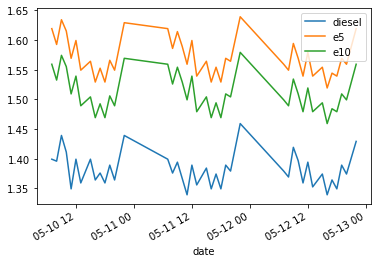

In [36]:
prices_resampled_station.plot(kind='line', x='date', y=['diesel', 'e5', 'e10'])

The station list doesn't work until now. Only shows the data of the first station

In [98]:
prices_resampled_stationlist = prices_resampled_station[prices_resampled_station.station_uuid.isin(near_stations)]

In [99]:
prices_resampled_stationlist

,station_uuid,date,diesel,e5,e10,dieselchange,e5change,e10change


But this one works

Here we can see the data about our and the three competitors that were chosen earlier

In [60]:
prices_resampled_stations = prices_resampled[(prices_resampled.station_uuid == "ca944555-1ee4-4228-979d-8313690ae950") | (prices_resampled.station_uuid == "51d4b534-a095-1aa0-e100-80009459e03a") | (prices_resampled.station_uuid == "4e25d68d-ee62-49be-8abd-c4fc908bbc91") | (prices_resampled.station_uuid == "386fa94f-2434-451c-981e-a7e230e08114")]

In [61]:
prices_resampled_stations

,station_uuid,date,diesel,e5,e10,dieselchange,e5change,e10change
141451,386fa94f-2434-451c-981e-a7e230e08114,2021-05-10 05:00:00,1.439,1.6190,1.5590,1.000000,1.0,1.0
141452,386fa94f-2434-451c-981e-a7e230e08114,2021-05-10 06:00:00,1.369,1.5740,1.5140,0.500000,1.0,1.0
141453,386fa94f-2434-451c-981e-a7e230e08114,2021-05-10 07:00:00,1.369,1.5865,1.5265,0.000000,1.0,1.0
141454,386fa94f-2434-451c-981e-a7e230e08114,2021-05-10 09:00:00,1.369,1.5890,1.5290,0.000000,1.0,1.0
141455,386fa94f-2434-451c-981e-a7e230e08114,2021-05-10 10:00:00,1.354,1.5690,1.5090,0.500000,1.0,1.0
...,...,...,...,...,...,...,...,...
444658,ca944555-1ee4-4228-979d-8313690ae950,2021-05-12 17:00:00,1.364,1.5440,1.4840,1.000000,1.0,1.0
444659,ca944555-1ee4-4228-979d-8313690ae950,2021-05-12 18:00:00,1.349,1.5390,1.4790,1.000000,0.0,0.0
444660,ca944555-1ee4-4228-979d-8313690ae950,2021-05-12 19:00:00,1.389,1.5690,1.5090,0.333333,1.0,1.0
444661,ca944555-1ee4-4228-979d-8313690ae950,2021-05-12 20:00:00,1.374,1.5590,1.4990,1.000000,0.0,0.0


This can be also visualized in a line graph:

In [62]:
import seaborn as sns

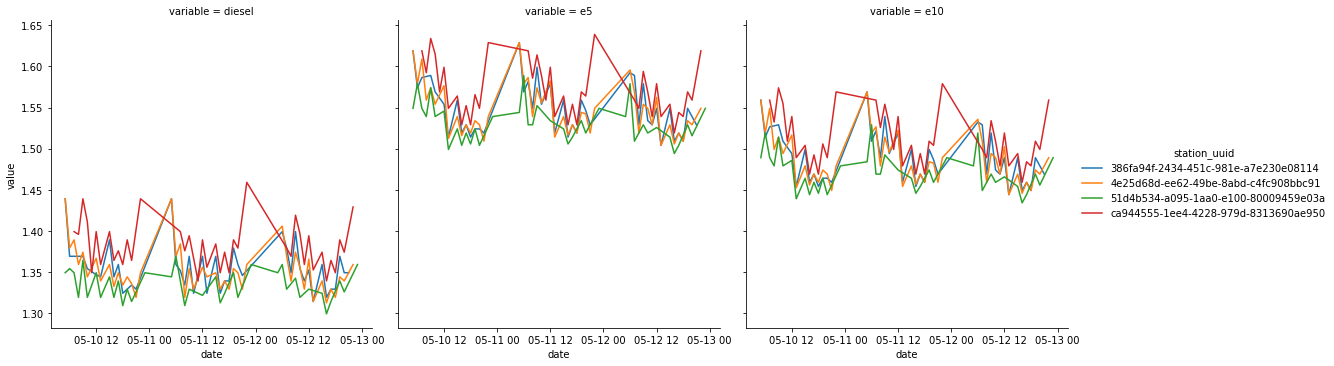

In [63]:
sns.relplot(x='date', col='variable',y='value', hue='station_uuid', kind='line',
            data=pd.melt(prices_resampled_stations, value_vars=['diesel', 'e5', 'e10'], id_vars=['date', 'station_uuid']))

# Models

For further analysis, data of the oil price will be included

RANDOM FOREST

Für den Random Forest teil kann man sagen "Neural networks can be good, but random forests learn faster & better"